In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp
import scipy.interpolate
import os
import sys
from mpl_styles import analytic
sys.path.insert(0, '/home/astrosun/jtlaune/athena/vis/python')
import athena_read
%matplotlib widget

In [5]:
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-fiducial-1e-4/")
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-accrete-1e-4/restart1/")
#os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunI_Acc/")
#data0 = athena_read.athdf("ppd_cyl.out1.00000.athdf")
#rho0 = data0["dens"][0,:,:]
#vr0 = data0["mom1"][0,::1,::1]/data0["dens"][0,::1,::1]
#vth0 = data0["mom2"][0,::1,::1]/data0["dens"][0,::1,::1]

data = athena_read.athdf("ppd_cyl.out1.00030.athdf")
rho = data["dens"][0,:,:]
vr = data["mom1"][0,::1,::1]/data["dens"][0,::1,::1]
vth = data["mom2"][0,::1,::1]/data["dens"][0,::1,::1]

coordsr, coordsth = np.meshgrid(data["x1v"], data["x2v"])
coordsx = coordsr*np.cos(coordsth)
coordsy = coordsr*np.sin(coordsth)

7318 9066 48151 50153
(98304, 16384)
[[0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 ...
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]
 [0.936023   0.93609625 0.93616945 ... 1.0638306  1.0639038  1.0639771 ]]
(1000000,)
(1000000,)
(1000000,)


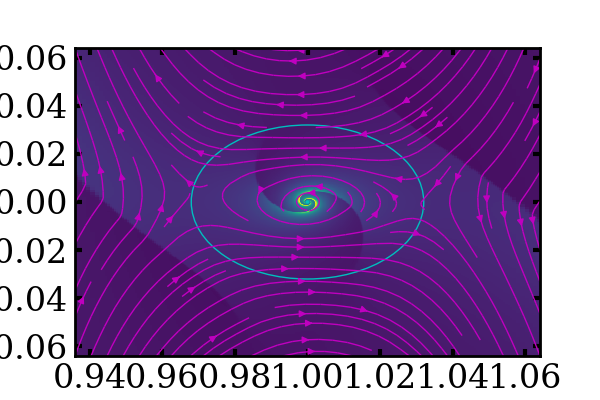

In [6]:
@mpl.rc_context(analytic)
def plot():
    strobe = 1
    x1min,x1max = 0.936,1.064
    x2min,x2max = -0.064,0.064
    #x1min,x1max = 0.99,1.01
    #x2min,x2max = -0.01,0.01
    x1min_ind = np.where(data["x1v"]>x1min)[0][0]
    x1max_ind = np.where(data["x1v"]>x1max)[0][0]
    x2min_ind = np.where(data["x2v"]>x2min)[0][0]
    x2max_ind = np.where(data["x2v"]>x2max)[0][0]
    print(x1min_ind,x1max_ind,x2min_ind,x2max_ind)
    print(coordsr.shape)
    print(coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe])
    fig, ax = plt.subplots(figsize=(6,4))

    rc = coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    thc = coordsth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    rhoc = rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vrc = vr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vthc = vth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]

    pointsc = np.zeros((len(rc.flatten()),2))
    rhoc = rhoc.flatten()
    vrc = vrc.flatten()
    vthc = vthc.flatten()
    pointsc[:,0] = rc.flatten()
    pointsc[:,1] = thc.flatten()

    ri = np.linspace(rc.min(),rc.max(),1000)
    thi = np.linspace(thc.min(),thc.max(),1000)
    ri, thi = np.meshgrid(ri,thi)
    ri = ri.flatten()
    thi = thi.flatten()

    interprho = sp.interpolate.griddata(pointsc,rhoc,(ri,thi))
    interpvr = sp.interpolate.griddata(pointsc,vrc,(ri,thi))
    interpvth = sp.interpolate.griddata(pointsc,vthc,(ri,thi))
    print(ri.shape)
    print(thi.shape)
    print(interprho.shape)

    #cs1 = ax.pcolormesh(ri.reshape(1000,1000),
    #                    thi.reshape(1000,1000),
    #                    interprho.reshape(1000,1000))

    ax.streamplot(ri.reshape(1000,1000),
                  thi.reshape(1000,1000),
                  interpvr.reshape(1000,1000),
                  interpvth.reshape(1000,1000),linewidth=1,color="m")

    cs1 = ax.pcolormesh(coordsr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe],
                        coordsth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe],
                        rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe])
    #cs1 = ax.pcolormesh(coordsr,
    #                    coordsth,
    #                    rho)
    ax.set_xlim(x1min,x1max)
    ax.set_ylim(x2min,x2max)
    #cs1 = ax.pcolormesh(coordsr[x1min_ind:x1max_ind,x2min_ind:x2max_ind],coordsth[x1min_ind:x1max_ind,x2min_ind:x2max_ind],rho[x1min_ind:x1max_ind,x2min_ind:x2max_ind])
    #cs1 = ax.quiver(data["x1v"], data["x2v"], 
    #                    vr, vth)#,shading="auto", norm=colors.LogNorm())
    circ = plt.Circle((1, 0), 0.00032, color='c', fill=False)
    ax.add_patch(circ)
    circ = plt.Circle((1, 0), 0.00036, color='c', fill=False)
    ax.add_patch(circ)
    circ = plt.Circle((1, 0), 0.032, color='c', fill=False)
    ax.add_patch(circ)
    #
    #
    #fig.colorbar(cs1)
    #ax.set_xlabel(r"$X$")
    #ax.set_ylabel(r"$Y$")
    #
    ##fig.colorbar(cs2)
    ##ax.set_title("integrator=vl2 & xorder=2")
    #fig.tight_layout()
    #
    #
plot()

In [15]:
nomTorque = 1e-4**2/0.05**2
print(nomTorque)
bondiNorm = 1e-4**2/0.05**3
print(bondiNorm)

3.999999999999999e-06
7.999999999999998e-05


In [19]:
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunI_noAcc/")
hst1 = np.loadtxt("ppd_cyl.hst")
os.chdir("/home/astrosun/rixinli/runs/JT/PrelimProductRun/JTrunI_Acc/")
hst2 = np.loadtxt("ppd_cyl.hst")

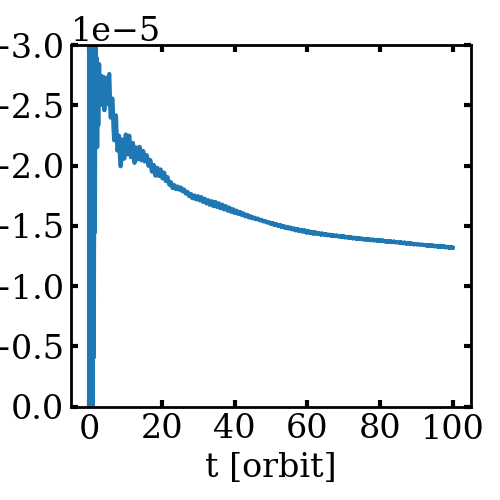

In [17]:
@mpl.rc_context(analytic)
def plot(hst1,hst2):
    fig, ax = plt.subplots(figsize=(5,5))
    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-accrete-1e-4/restart1/")
    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/2percent-lowres-fiducial-1e-4/")
    #os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
    t=hst1[:,0]/np.pi/2
    tstart = 90
    #it = np.where(t>20)[0][0]
    it = 0
    t = t[it:]
    Fsgrav_x=hst1[:,-5]
    Fsgrav_y=hst1[:,-4]
    accrate=hst1[:,-3]
    momx_accrate =hst1[:,-2]
    momy_accrate =hst1[:,-1]
    ax.plot(t, Fsgrav_y[it:]) # fixed in code but forgot to make
    ax.axhline(y=nomTorque,c="k",ls="--")
    #ax.plot(t, accrate)
    #ax.plot(t, momy_accrate)
    #ax.set_yscale("symlog", linthresh=1e-5)
    #ax.axhline(y=bondiNorm,c="k",ls="--")

    ax.set_ylim((0,-3e-5))
    #ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    fig.tight_layout()
plot(hst1,hst2)

NameError: name 'bondiNorm' is not defined

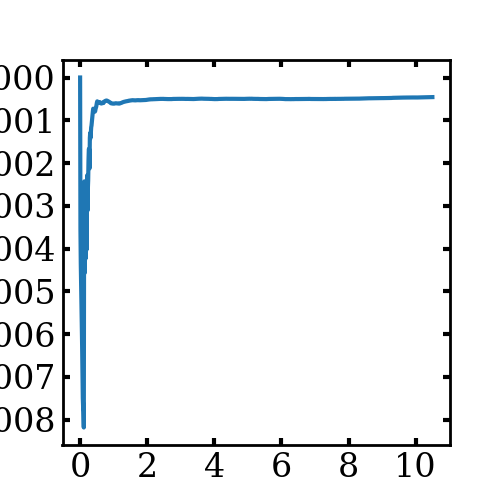

In [6]:
@mpl.rc_context(analytic)
def plot():
    os.chdir("/home/astrosun/jtlaune/athena/work-accretion/")
    hst = np.loadtxt("ppd_cyl.hst")
    t=hst[:,0]/np.pi/2
    fig, ax = plt.subplots(figsize=(5,5))
    Fsgrav_x=hst[:,-5]
    Fsgrav_y=hst[:,-4]
    accrate=hst[:,-3]
    momx_accrate =hst[:,-2]
    momy_accrate =hst[:,-1]
    ax.plot(t, accrate)
    ax.axhline(y=bondiNorm,c="k",ls="--")
    ax.set_xlim((0,t[-1]))
    ax.set_xlabel(r"t [orbit]")
    ax.set_yscale("symlog", linthresh=1e-5)
    fig.tight_layout()
plot()